## **Task1: State Vector simulation of quantum circuits**
- Sebastian Paucar.
- Cohort 10 Screening Tasks.
- QOSF Mentorship Program.

We import the appropriate libraries. We will use Qiskit for practical reasons.

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np
import time
import matplotlib.pyplot as plt

We define the general n-qubit functions that will generate the matrix representations of the quantum gates we will use.

In [2]:
def X_n(n):
    qc_X = QuantumCircuit(n)
    qc_X.x(range(n))
    nq_X = Operator(qc_X).data
    return nq_X
def H_n(n):
    qc_H = QuantumCircuit(n)
    qc_H.h(range(n))
    nq_H = Operator(qc_H).data
    return nq_H
def I_n(n):
    qc_I = QuantumCircuit(n)
    qc_I.i(range(n))
    nq_I = Operator(qc_I).data
    return nq_I
def CNOT_n(n):
    qc_CNOT = QuantumCircuit(n)
    qc_CNOT.mcx(list(range(1, n)), 0) 
    nq_CNOT = Operator(qc_CNOT).data
    return nq_CNOT

We visualize the quantum circuit that we will use (for the following example we are going to draw a 5-qubit circuit). Since the problem does not specify otherwise, we will use this sequential structure, which includes a multi-controlled CNOT.

In [76]:
n = 5
qc= QuantumCircuit(n)
qc.i(range(n))
qc.x(range(n))
qc.h(range(n))
qc.mcx(list(range(1, n)), 0) 
print(qc)

/var/folders/l0/m18k0r_57bd_90vd5qjxdpth0000gp/T/ipykernel_6008/1863699796.py:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.id as direct replacement.
  qc.i(range(n))


     ┌───┐┌───┐┌───┐┌───┐
q_0: ┤ I ├┤ X ├┤ H ├┤ X ├
     ├───┤├───┤├───┤└─┬─┘
q_1: ┤ I ├┤ X ├┤ H ├──■──
     ├───┤├───┤├───┤  │  
q_2: ┤ I ├┤ X ├┤ H ├──■──
     ├───┤├───┤├───┤  │  
q_3: ┤ I ├┤ X ├┤ H ├──■──
     ├───┤├───┤├───┤  │  
q_4: ┤ I ├┤ X ├┤ H ├──■──
     └───┘└───┘└───┘     


## ***Naive simulation using matrix multiplication***

We take until 10 qubits to perform our simulation:

/var/folders/l0/m18k0r_57bd_90vd5qjxdpth0000gp/T/ipykernel_6008/2191494871.py:13: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.id as direct replacement.
  qc_I.i(range(n))


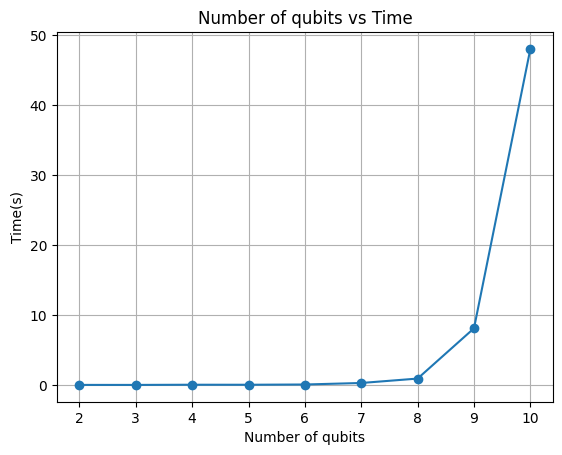

In [5]:
nq = 10
nqubits = range(2,nq+1)
t = []

for n in nqubits:
    sv = np.zeros(2**n); sv[0] = 1
    # Start time taking
    ti = time.time()
    # n-qubit I is applied:
    sv = I_n(n) @ sv
    # n-qubit X is applied:
    sv = X_n(n) @ sv
    # n-qubit H is applied:
    sv = H_n(n) @ sv
    # n-qubit CNOT is applied:
    sv = CNOT_n(n) @ sv
    tf = time.time()
    # End time taking
    dt = tf - ti
    t.append(dt)
# Now, we have to plot our results:   
plt.plot(nqubits,t,marker ='o')
plt.xlabel('Number of qubits')
plt.ylabel('Time(s)')
plt.title('Number of qubits vs Time')
plt.grid()
plt.show()

## ***Advanced simulation using tensor multiplication***

/var/folders/l0/m18k0r_57bd_90vd5qjxdpth0000gp/T/ipykernel_6008/2191494871.py:13: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.id as direct replacement.
  qc_I.i(range(n))


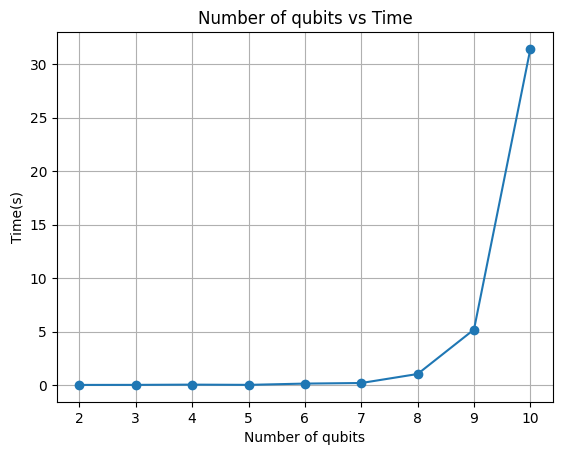

In [75]:
# We take until 10 qubits again:
nq = 10
nqubits = range(2,nq+1)
zero_sv = [1, 0] 
t = []

for n in nqubits:
    sv = [np.array(zero_sv).reshape(-1, 1) for _ in range(n)]
    sv_tensor = np.hstack(sv)
    # sv_tensor saves the tensor representation of sv
    # Start time taking
    ti = time.time()
    #1-qubit I is applied in the statevector tensor representation
    sv_tensor = np.tensordot(I_n(1), sv_tensor, axes=([1], [0]))
    #1-qubit X is applied in the statevector tensor representation
    sv_tensor = np.tensordot(X_n(1), sv_tensor, axes=([1], [0]))
    #1-qubit H is applied in the statevector tensor representation
    sv_tensor = np.tensordot(H_n(1), sv_tensor, axes=([1], [0]))
    #We have to reshape sv_tensor to apply CNOT on it 
    sv= sv_tensor.flatten(order='F')
    sv_prod = np.array(sv[0:2])
    for i in range(2, len(sv), 2):
        sv_prod = np.tensordot(sv_prod, sv[i:i+2], axes=0)
    sv = sv_prod.flatten()
    #CNOT is applied
    sv = CNOT_n(n) @ sv
    tf = time.time()
    # End time taking
    dt = tf - ti
    t.append(dt)
# Now, we have to plot our results:  
plt.plot(nqubits,t,marker ='o')
plt.xlabel('Number of qubits')
plt.ylabel('Time(s)')
plt.title('Number of qubits vs Time')
plt.grid()
plt.show()

### ***Conclusion: We note that the tensor representation results in shorter processing time!***

## ***Bonus question***

1. **How would you sample from the final states in the state vector or tensor representations?**

 - To sample from final states in a state vector or tensor, we have to compute the probabilities $P_i = |ψ_i|^2$ for each basis state. Then, we can use sampling techniques, like Monte Carlo, to select a basis state based on these probabilities.
  
2. **And how about computing exact expectation values in the form <Ψ| Op |Ψ>?**

- To compute the exact expectation values, we need to use the usual inner product, which is a product between matrices.